In [1]:
# Active cases -> currently covid positive
# Recovered cases -> recovered from covid
# Deaths -> Died for covid
# Confirmed -> Active + Recovered + Deaths

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/covid_19_clean_complete (1).csv")

In [4]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [5]:
df.shape

(49068, 10)

In [6]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [7]:
# Rename the columns

df.rename(columns = {
    'Province/State' : "state",
    'Country/Region' : "country",
    'Lat' : "lat",
    'Long' : "long",
    'Date' : "date",
    'Confirmed' : "confirmed",
    'Deaths' : "deaths",
    'Recovered' : "recovered",
    'Active' : "active",
    'WHO Region' : "who"
}, inplace = True)

In [8]:
df.columns

Index(['state', 'country', 'lat', 'long', 'date', 'confirmed', 'deaths',
       'recovered', 'active', 'who'],
      dtype='object')

In [9]:
df.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,who
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [12]:
#We have to check date of records
df["date"].min()

'2020-01-22'

In [13]:
df["date"].max()

'2020-07-27'

In [14]:
# Records from the last date  - June 27th
top = df[df["date"] ==  df["date"].max()]
top.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,who
48807,NaN,Afghanistan,33.93911,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.15330,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.03390,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.50630,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.20270,17.873900,2020-07-27,950,41,242,667,Africa


In [15]:
# group by

world = top.groupby("country")["confirmed", "active", "recovered", "deaths"].sum().reset_index()
world

<ipython-input-15-74094762fec2>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  world = top.groupby("country")["confirmed", "active", "recovered", "deaths"].sum().reset_index()


,country,confirmed,active,recovered,deaths
0,Afghanistan,36263,9796,25198,1269
1,Albania,4880,1991,2745,144
2,Algeria,27973,7973,18837,1163
3,Andorra,907,52,803,52
4,Angola,950,667,242,41
...,...,...,...,...,...
182,West Bank and Gaza,10621,6791,3752,78
183,Western Sahara,10,1,8,1
184,Yemen,1691,375,833,483
185,Zambia,4552,1597,2815,140


In [16]:
# Hear we use plotly for expressing Map
import plotly
import plotly.express as px

figure = px.choropleth(world, locations = "country",
                       locationmode = "country names", color ="active",
                       hover_name = "country", range_color = [1,20000],
                       color_continuous_scale= "reds",
                       title = "Countried with active cases")
figure.show()

In [17]:
# Total confirmed cases in all countries together datewise

total_cases = df.groupby("date")["confirmed", "active", "recovered", "deaths"].sum().reset_index()
total_cases

<ipython-input-17-a70ee5d79532>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,date,confirmed,active,recovered,deaths
0,2020-01-22,555,510,28,17
1,2020-01-23,654,606,30,18
2,2020-01-24,941,879,36,26
3,2020-01-25,1434,1353,39,42
4,2020-01-26,2118,2010,52,56
...,...,...,...,...,...
183,2020-07-23,15510481,6166006,8710969,633506
184,2020-07-24,15791645,6212290,8939705,639650
185,2020-07-25,16047190,6243930,9158743,644517
186,2020-07-26,16251796,6309711,9293464,648621


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      14664 non-null  object 
 1   country    49068 non-null  object 
 2   lat        49068 non-null  float64
 3   long       49068 non-null  float64
 4   date       49068 non-null  object 
 5   confirmed  49068 non-null  int64  
 6   deaths     49068 non-null  int64  
 7   recovered  49068 non-null  int64  
 8   active     49068 non-null  int64  
 9   who        49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [19]:
total_cases["date"] = pd.to_datetime(total_cases["date"])

In [21]:
total_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       188 non-null    datetime64[ns]
 1   confirmed  188 non-null    int64         
 2   active     188 non-null    int64         
 3   recovered  188 non-null    int64         
 4   deaths     188 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 7.5 KB


Text(0, 0.5, 'Total confirmed cases')

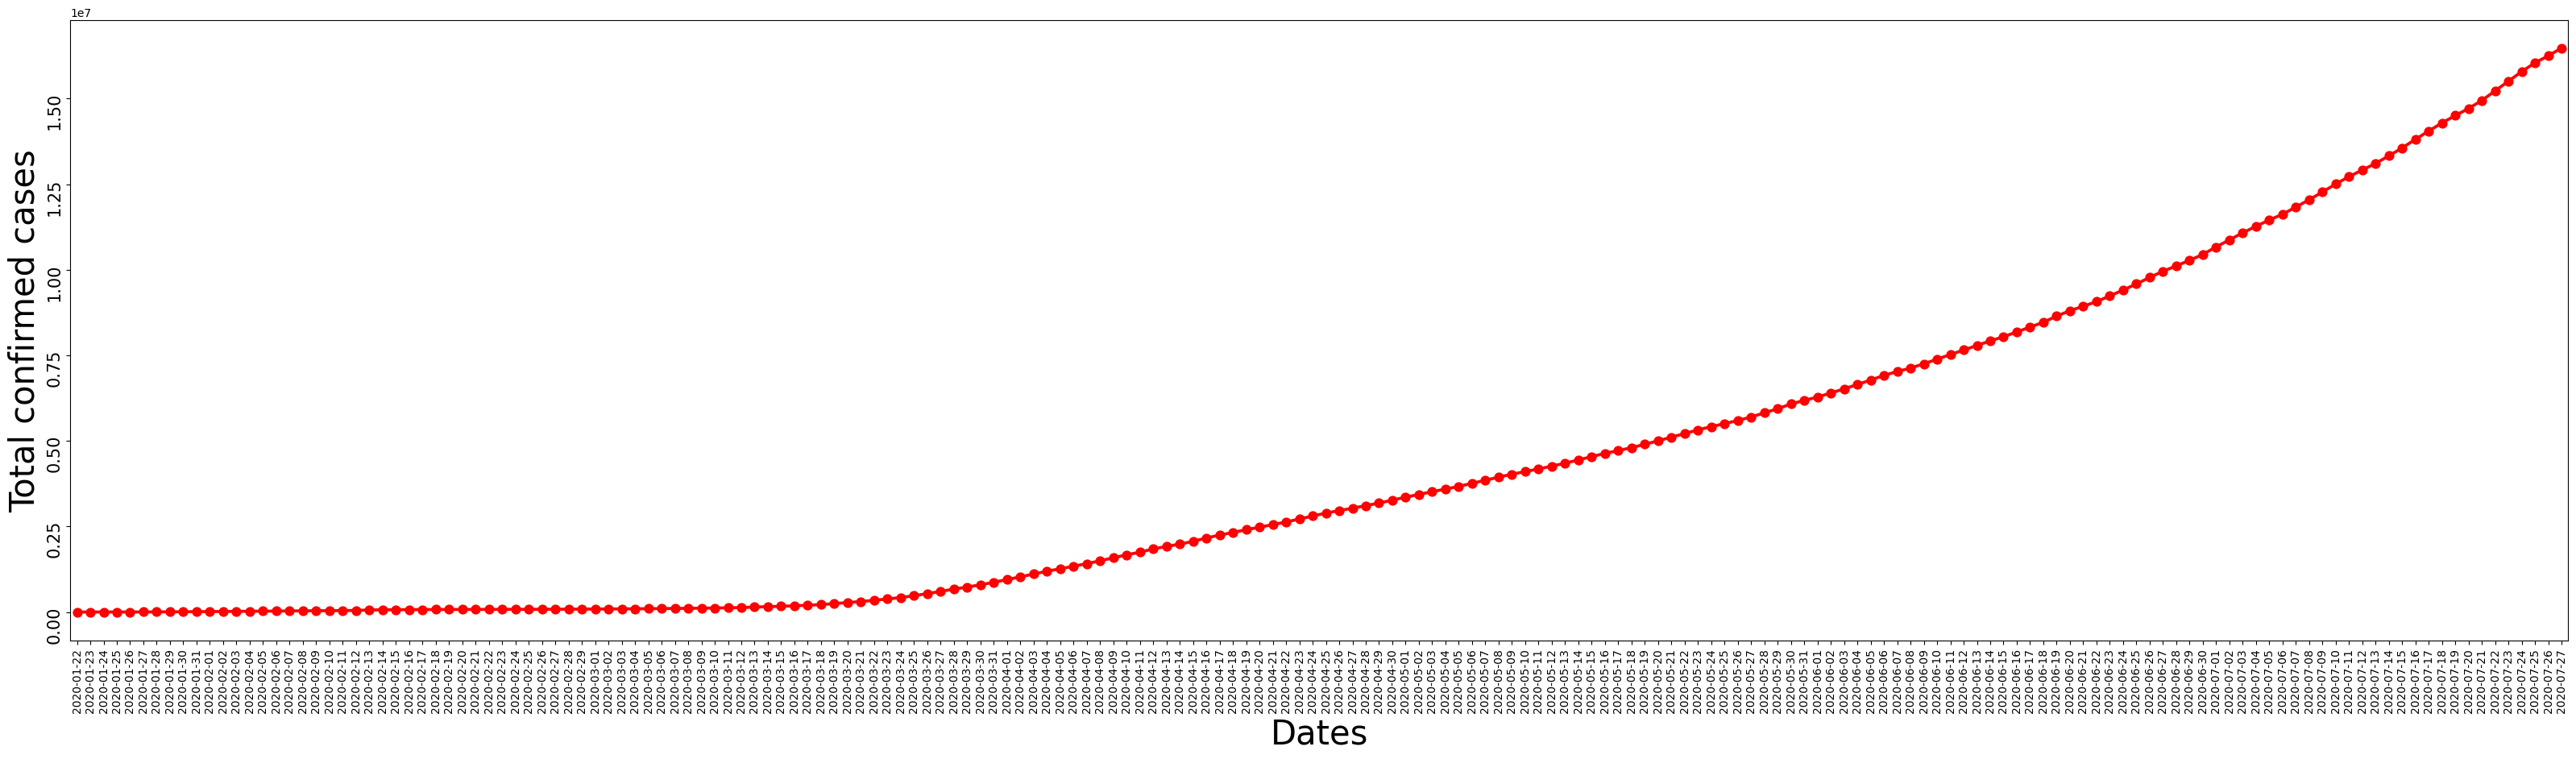

In [22]:
# Tofind the trend of total cases


plt.figure(figsize = (40,10))
ax = sns.pointplot(x = total_cases.date.dt.date, y = total_cases.confirmed, color = "r")
ax.set(xlabel = "Dates", ylabel = "Total cases")

plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(rotation = 90, fontsize = 15)

plt.xlabel("Dates", fontsize = 30)
plt.ylabel("Total confirmed cases", fontsize = 30)

In [23]:
# To Find trend as country wise

df.groupby("country")["active", "recovered", "deaths"].sum().reset_index()

<ipython-input-23-a1348f6095fc>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,country,active,recovered,deaths
0,Afghanistan,1089052,798240,49098
1,Albania,72117,118877,5708
2,Algeria,345886,755897,77972
3,Andorra,19907,69074,5423
4,Angola,15011,6573,1078
...,...,...,...,...
182,West Bank and Gaza,170967,61124,1370
183,Western Sahara,190,648,63
184,Yemen,25694,23779,17707
185,Zambia,43167,83611,2643


In [24]:
#Active Cases
# Top 20 countries with highest number of active cases for the last date july 27th 2020

top_actives = top.groupby("country")["active"].sum().sort_values(ascending = False).head(20).reset_index()
top_actives.head(20)

,country,active
0,US,2816444
1,Brazil,508116
2,India,495499
3,United Kingdom,254427
4,Russia,201097
5,South Africa,170537
6,Colombia,117163
7,France,108928
8,Canada,107514
9,Peru,98752


Text(0, 0.5, 'Top 20 countries')

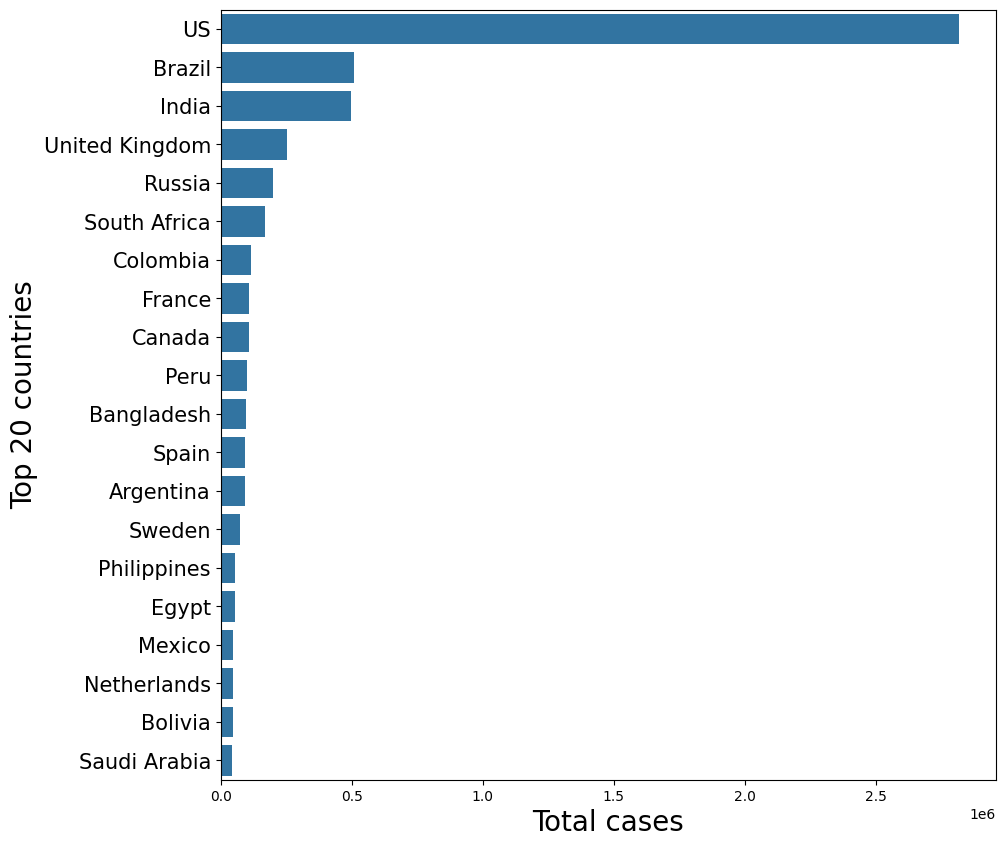

In [26]:
plt.figure(figsize = (10,10))

ax = sns.barplot(x = top_actives.active, y = top_actives.country)
ax.set(xlabel = "Total cases", ylabel = "Country")

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 15)

plt.xlabel("Total cases", fontsize = 20)
plt.ylabel("Top 20 countries", fontsize = 20)

In [27]:
#Confirmed Cases
# Top 20 countries with highest number of confirmed cases for the last date july 27th 2020

top_confirmed = top.groupby("country")["confirmed"].sum().sort_values(ascending = False).head(20).reset_index()
top_confirmed.head(20)

,country,confirmed
0,US,4290259
1,Brazil,2442375
2,India,1480073
3,Russia,816680
4,South Africa,452529
5,Mexico,395489
6,Peru,389717
7,Chile,347923
8,United Kingdom,301708
9,Iran,293606


Text(0, 0.5, 'Top 20 countries')

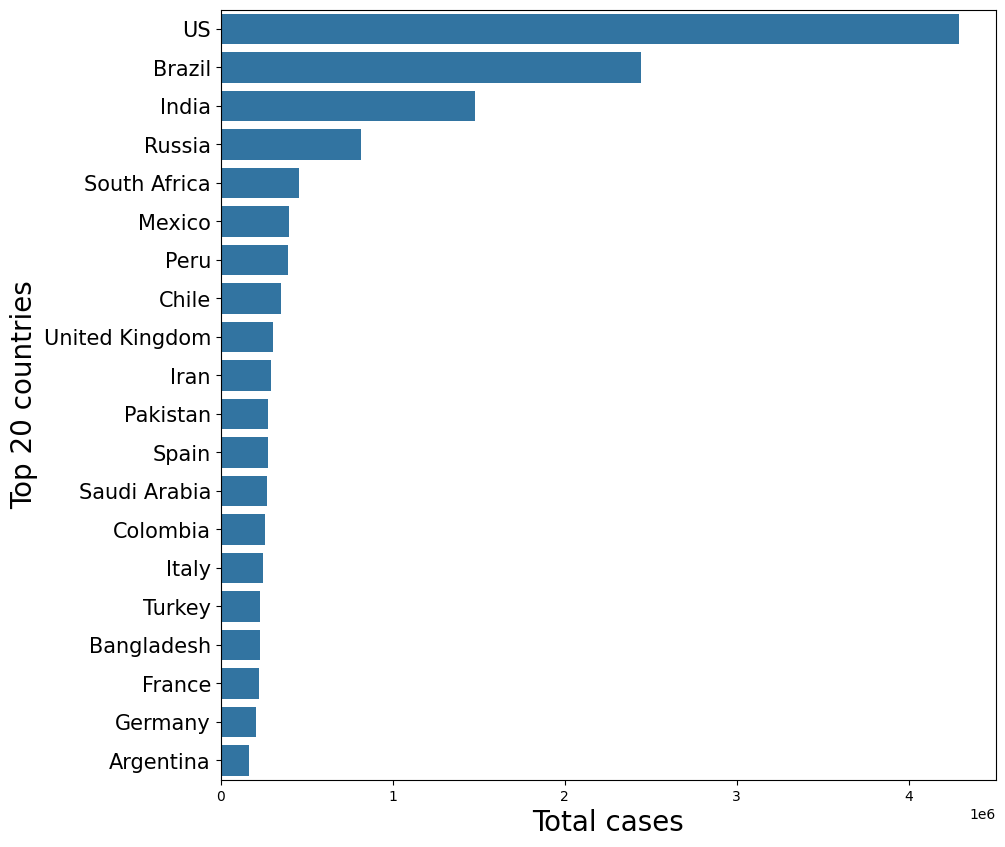

In [28]:
plt.figure(figsize = (10,10))

ax = sns.barplot(x = top_confirmed.confirmed, y = top_confirmed.country)
ax.set(xlabel = "Total cases", ylabel = "Country")

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 15)

plt.xlabel("Total cases", fontsize = 20)
plt.ylabel("Top 20 countries", fontsize = 20)

In [29]:
#Recovered Cases
# top 20 countries with highest number of recovered cases for the last date july 27th 2020

top_recovered = top.groupby("country")["recovered"].sum().sort_values(ascending = False).head(20).reset_index()
top_recovered

,country,recovered
0,Brazil,1846641
1,US,1325804
2,India,951166
3,Russia,602249
4,Chile,319954
5,Mexico,303810
6,South Africa,274925
7,Peru,272547
8,Iran,255144
9,Pakistan,241026


Text(0, 0.5, 'Top 20 countries')

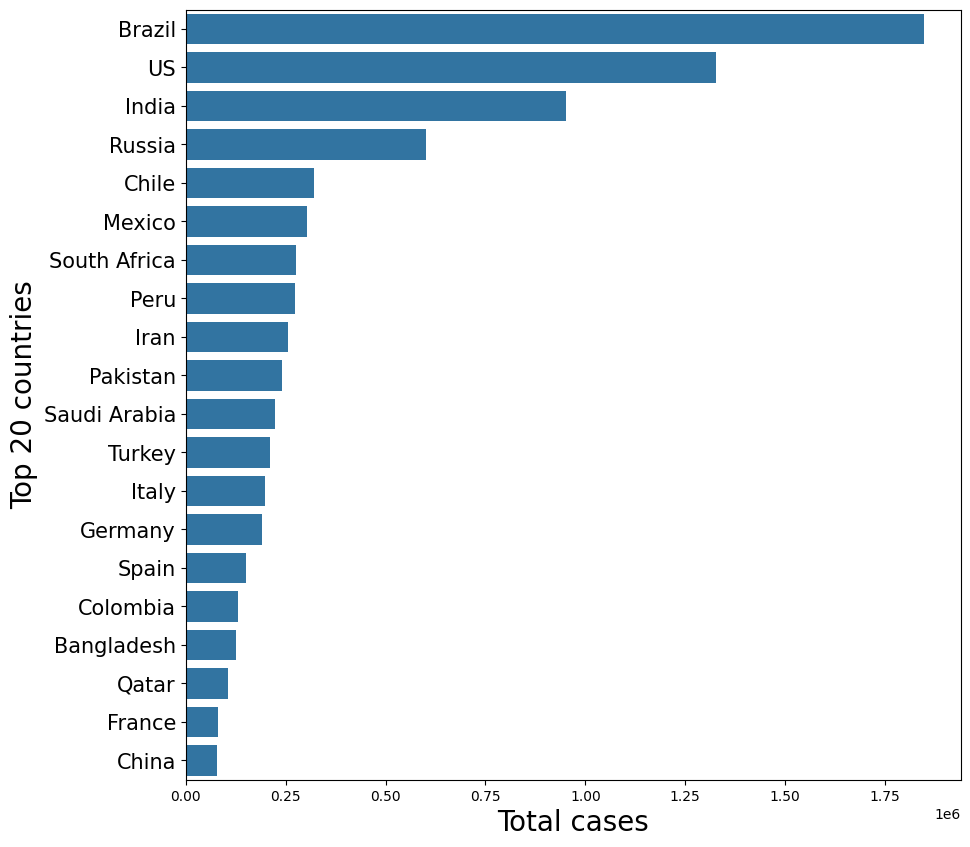

In [30]:
plt.figure(figsize = (10,10))

ax = sns.barplot(x = top_recovered.recovered, y = top_recovered.country)
ax.set(xlabel = "Total cases", ylabel = "Country")

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 15)

plt.xlabel("Total cases", fontsize = 20)
plt.ylabel("Top 20 countries", fontsize = 20)

In [31]:
#Total Death Cases
# top 20 countries with highest number of deaths cases for the last date july 27th 2020

top_deaths = top.groupby("country")["deaths"].sum().sort_values(ascending = False).head(20).reset_index()
top_deaths.head(20)

,country,deaths
0,US,148011
1,Brazil,87618
2,United Kingdom,45844
3,Mexico,44022
4,Italy,35112
5,India,33408
6,France,30212
7,Spain,28432
8,Peru,18418
9,Iran,15912


Text(0, 0.5, 'Top 20 countries')

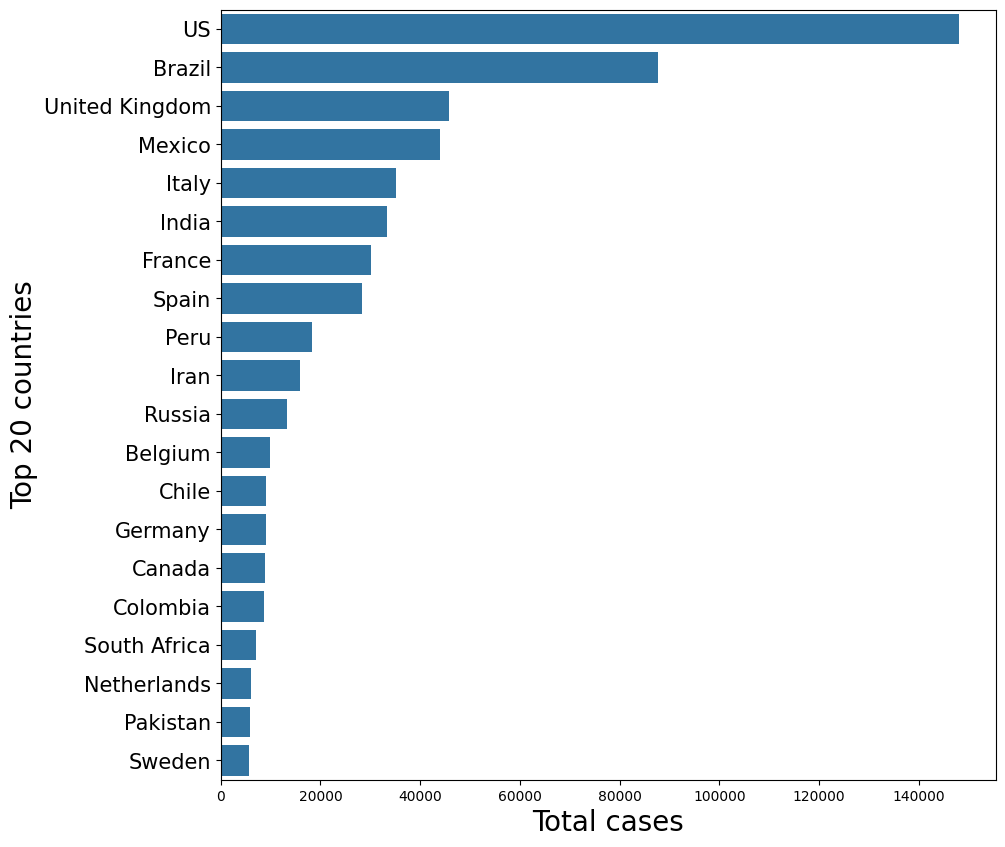

In [32]:
plt.figure(figsize = (10,10))

ax = sns.barplot(x = top_deaths.deaths, y = top_deaths.country)
ax.set(xlabel = "Total cases", ylabel = "Country")

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 15)

plt.xlabel("Total cases", fontsize = 20)
plt.ylabel("Top 20 countries", fontsize = 20)

In [33]:
#Now we will compare data country wise
#For confirmed cases
# US data

us = df[df["country"] == "US"]
us = us.groupby("date")["active", "recovered", "deaths", "confirmed"].sum().reset_index()
us


<ipython-input-33-d691832bcef7>:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,date,active,recovered,deaths,confirmed
0,2020-01-22,1,0,0,1
1,2020-01-23,1,0,0,1
2,2020-01-24,2,0,0,2
3,2020-01-25,2,0,0,2
4,2020-01-26,5,0,0,5
...,...,...,...,...,...
183,2020-07-23,2661117,1233269,144430,4038816
184,2020-07-24,2705347,1261624,145560,4112531
185,2020-07-25,2753091,1279414,146465,4178970
186,2020-07-26,2789125,1297863,146935,4233923


In [34]:
# Brazil data

brazil = df[df["country"] == "Brazil"]
brazil = brazil.groupby("date")["active", "recovered", "deaths", "confirmed"].sum().reset_index()
brazil

<ipython-input-34-d5163d797ed8>:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,date,active,recovered,deaths,confirmed
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,583080,1620313,84082,2287475
184,2020-07-24,564914,1693214,85238,2343366
185,2020-07-25,522705,1785359,86449,2394513
186,2020-07-26,519174,1812913,87004,2419091


In [35]:
# India data

india = df[df["country"] == "India"]
india = india.groupby("date")["active", "recovered", "deaths", "confirmed"].sum().reset_index()
india

<ipython-input-35-4eee344429a6>:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,date,active,recovered,deaths,confirmed
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,440298,817209,30601,1288108
184,2020-07-24,456234,849432,31358,1337024
185,2020-07-25,468002,885573,32060,1385635
186,2020-07-26,485277,917568,32771,1435616


In [36]:
# China data

china = df[df["country"] == "China"]
china = china.groupby("date")["active", "recovered", "deaths", "confirmed"].sum().reset_index()
china

<ipython-input-36-27a8c3397c11>:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,date,active,recovered,deaths,confirmed
0,2020-01-22,503,28,17,548
1,2020-01-23,595,30,18,643
2,2020-01-24,858,36,26,920
3,2020-01-25,1325,39,42,1406
4,2020-01-26,1970,49,56,2075
...,...,...,...,...,...
183,2020-07-23,2695,78701,4649,86045
184,2020-07-24,2807,78745,4650,86202
185,2020-07-25,2916,78813,4652,86381
186,2020-07-26,3056,78862,4652,86570


Text(0, 0.5, 'Confirmed cases')

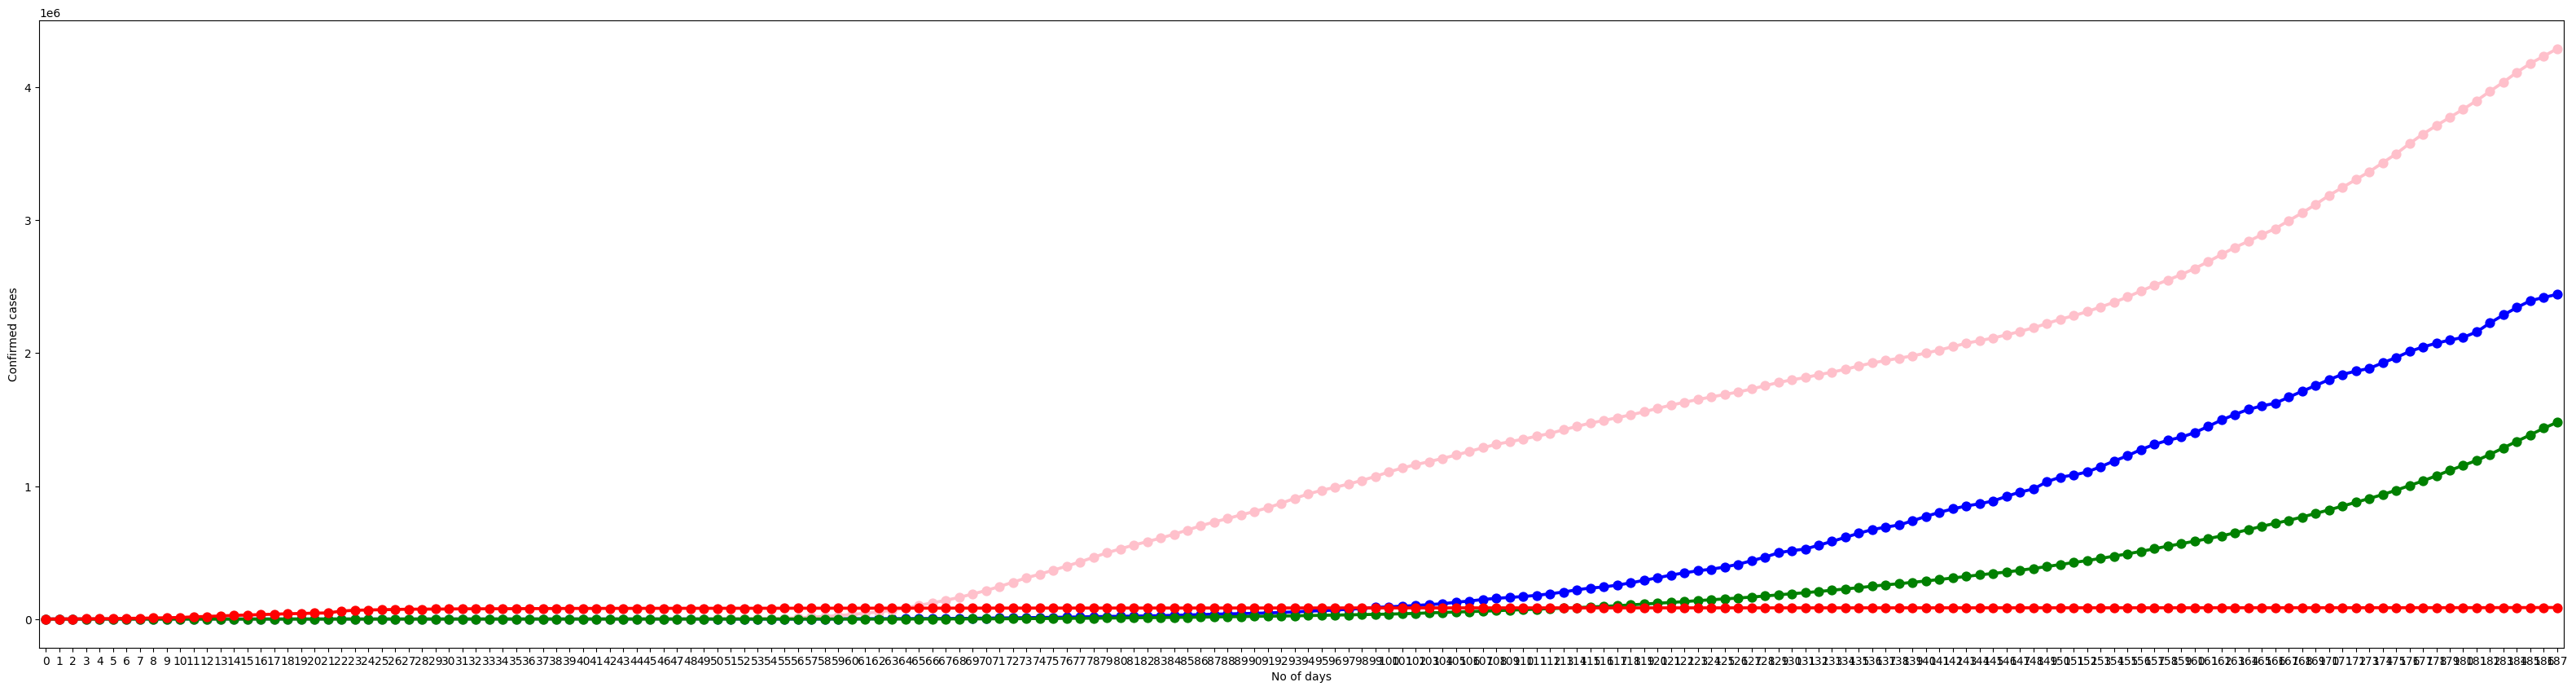

In [37]:
plt.figure(figsize = (40,10))
sns.pointplot( x = brazil.index , y = brazil.confirmed , color = "Blue")
sns.pointplot( x = us.index , y = us.confirmed , color = "Pink")
sns.pointplot( x = india.index , y = india.confirmed , color = "Green")
sns.pointplot( x = china.index , y = china.confirmed , color = "Red")

plt.xlabel("No of days")
plt.ylabel("Confirmed cases")

In [ ]:
# HW -> see the trend for recovered, deaths , active

# Model building using fb prophet -> Facebook prophet

In [38]:
pip install prophet

In [39]:
from prophet import Prophet
m = Prophet()

In [41]:
data = pd.read_csv("/content/covid_19_clean_complete (1).csv")
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [42]:
# confirmed cases

confirmed = data.groupby("Date")["Confirmed"].sum().reset_index()
confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [43]:
# active cases

active = data.groupby("Date")["Active"].sum().reset_index()
active

,Date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


In [44]:
# Deaths cases

deaths = data.groupby("Date")["Deaths"].sum().reset_index()
deaths

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [45]:
# Recovered cases

recovered = data.groupby("Date")["Recovered"].sum().reset_index()
recovered

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [46]:
# For building fb prophet model , there should be only 2 colums passed
# the column names should always be ---> "ds" , "y"

confirmed.columns = ["ds", "y"]
confirmed["ds"] = pd.to_datetime(confirmed["ds"])
confirmed.tail()

,ds,y
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [47]:
m.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk9fs6c6a/bziuv0cw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk9fs6c6a/bkp5acsx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16063', 'data', 'file=/tmp/tmpk9fs6c6a/bziuv0cw.json', 'init=/tmp/tmpk9fs6c6a/bkp5acsx.json', 'output', 'file=/tmp/tmpk9fs6c6a/prophet_modelawce0goo/prophet_model-20240227142216.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:22:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [48]:
future = m.make_future_dataframe(periods = 15)
future.tail(10)

,ds
193,2020-08-02
194,2020-08-03
195,2020-08-04
196,2020-08-05
197,2020-08-06
198,2020-08-07
199,2020-08-08
200,2020-08-09
201,2020-08-10
202,2020-08-11


In [49]:
forcast = m.predict(future)
forcast[["ds", "yhat","yhat_lower", "yhat_upper"]].tail(10)

,ds,yhat,yhat_lower,yhat_upper
193,2020-08-02,1.736430e+07,1.724679e+07,1.747839e+07
194,2020-08-03,1.755889e+07,1.744112e+07,1.767871e+07
195,2020-08-04,1.774813e+07,1.762066e+07,1.786771e+07
196,2020-08-05,1.795791e+07,1.782941e+07,1.808018e+07
197,2020-08-06,1.817184e+07,1.804398e+07,1.830193e+07
198,2020-08-07,1.838703e+07,1.824536e+07,1.853099e+07
199,2020-08-08,1.859469e+07,1.844176e+07,1.874213e+07
200,2020-08-09,1.879223e+07,1.863301e+07,1.895544e+07
201,2020-08-10,1.898682e+07,1.881721e+07,1.915289e+07
202,2020-08-11,1.917607e+07,1.899186e+07,1.935073e+07


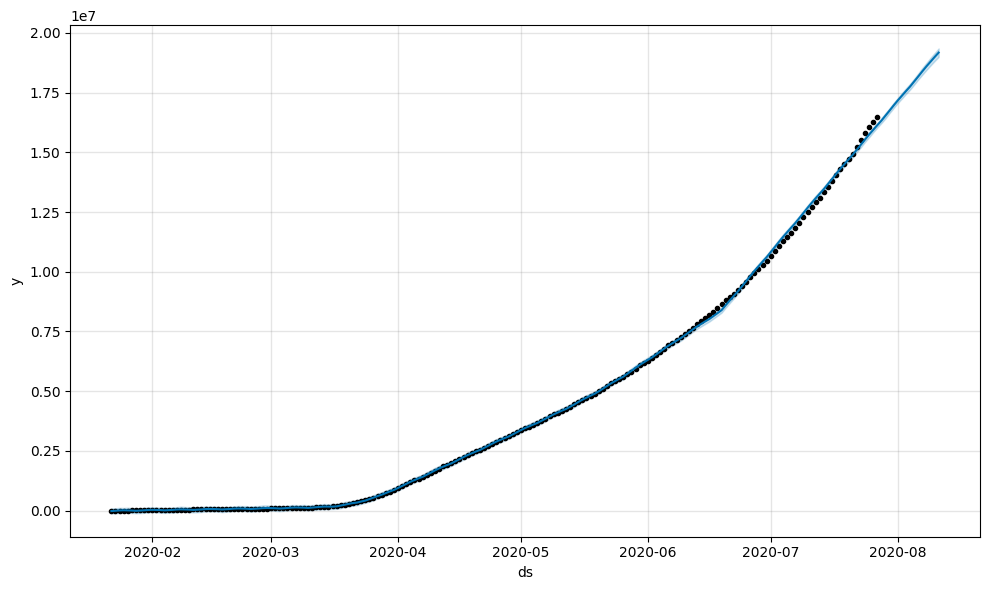

In [50]:
confirmed_forecasting_plot = m.plot(forcast)